# K-Means Clustering

K-Means clustering is an unsupervised machine learning algorithm used to partition a dataset into distinct groups or clusters. It groups data points based on their similarity, with \( k \) as the predefined number of clusters.

---

## Key Concepts
1. **Centroids**: Each cluster is defined by a centroid, which represents the center of the cluster.
2. **Distance Metric**: Euclidean distance is commonly used to measure the similarity between data points and centroids.
3. **Objective**: Minimize the within-cluster variance (sum of squared distances between points and their respective centroids).

---

## Steps in K-Means Clustering
1. **Initialization**: Randomly select \( k \) data points as initial centroids.
2. **Assignment**: Assign each data point to the nearest centroid, forming \( k \) clusters.
3. **Update**: Recalculate the centroids as the mean of all points in each cluster.
4. **Repeat**: Repeat the assignment and update steps until the centroids stabilize or the maximum number of iterations is reached.

---

## Example Use Cases
- Customer segmentation in marketing
- Image compression
- Anomaly detection
- Grouping similar products or manufacturing patterns

---

## Limitations
- Sensitive to the initial choice of centroids.
- Can converge to a local minimum, leading to suboptimal clustering.
- Requires specifying the number of clusters (\( k \)) in advance.
- Struggles with clusters of varying shapes, densities, or sizes.

---

## Practical Considerations
1. **Choosing \( k \)**:  
   - Use methods like the **Elbow Method** or **Silhouette Analysis** to determine the optimal number of clusters.
   
2. **Scaling Data**:  
   - Standardize or normalize data to ensure all features contribute equally to the distance calculations.
   
3. **Initialization Techniques**:  
   - Use smarter initialization methods like **\( k \)-means++** to improve the algorithm's performance.

---




## Step 1: Import Required Libraries




In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


## Step 2: Load and Preprocess the Data




In [2]:
# Load the dataset
df = pd.read_csv(('C:/Users/NANAYAW/OneDrive/Documents/GitHub/FinalProject/consumer_complaints.csv'))

# Check initial data
print("Initial Data Snapshot:")
print(df.head())


Initial Data Snapshot:
  date_received   Month  Year           product               sub_product  \
0     8/30/2013  August  2013          Mortgage            Other mortgage   
1     8/30/2013  August  2013          Mortgage            Other mortgage   
2     8/30/2013  August  2013  Credit reporting                       NaN   
3     8/30/2013  August  2013      Student loan  Non-federal student loan   
4     8/30/2013  August  2013   Debt collection               Credit card   

                                      issue  \
0  Loan modification,collection,foreclosure   
1  Loan servicing, payments, escrow account   
2    Incorrect information on credit report   
3                        Repaying your loan   
4        False statements or representation   

                           sub_issue consumer_complaint_narrative  \
0                                NaN                          NaN   
1                                NaN                          NaN   
2                     Ac

In [4]:


# Select features of interest for clustering
features = ['product', 'sub_product', 'issue', 'state', 'zipcode']

# Replace invalid ZIP codes (e.g., '342XX') with NaN, then drop or impute
df['zipcode'] = pd.to_numeric(df['zipcode'], errors='coerce')

# Drop rows with missing ZIP codes (optional: you can also fill with a placeholder or mean)
df = df.dropna(subset=['zipcode']).reset_index(drop=True)

# Encode categorical variables
encoder = LabelEncoder()
for col in ['product', 'sub_product', 'issue', 'state']:
    df[col] = encoder.fit_transform(df[col])

# Standardize numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Display cleaned dataset
print("\nCleaned Dataset (First 5 Rows):")
print(pd.DataFrame(df_scaled, columns=df.columns).head())



Cleaned Dataset (First 5 Rows):
    product  sub_product     issue     state   zipcode
0  0.737588     0.889965  0.413977 -1.186259  1.494915
1  0.737588     0.889965  0.459999 -1.186259  1.339075
2  2.323843     0.650710  1.380447 -0.137060 -0.882730
3 -0.055539    -0.944320 -0.184314 -0.778237 -0.605284
4 -1.641793    -1.183574 -0.368404 -0.486793  0.368649


## Step 3: Determine Optimal Clusters with Elbow Method



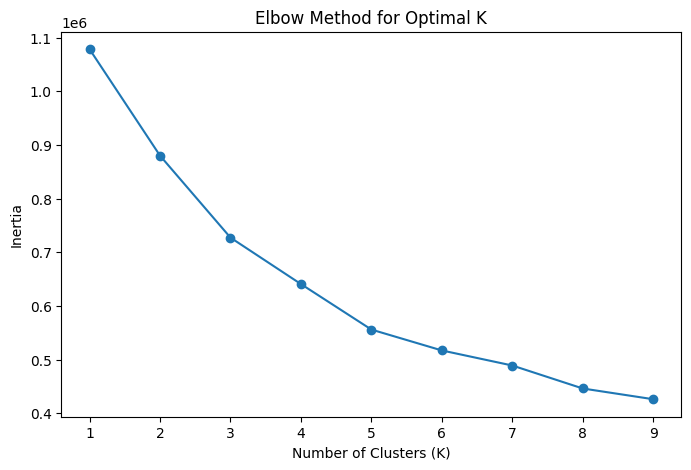

In [5]:
# Finding the optimal number of clusters
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


## Step 4: Perform K-Means Clustering and Visualize Clusters Using PCA (2D projection)




Cluster Counts:
Cluster
2    79407
3    47828
0    46965
1    41515
Name: count, dtype: int64


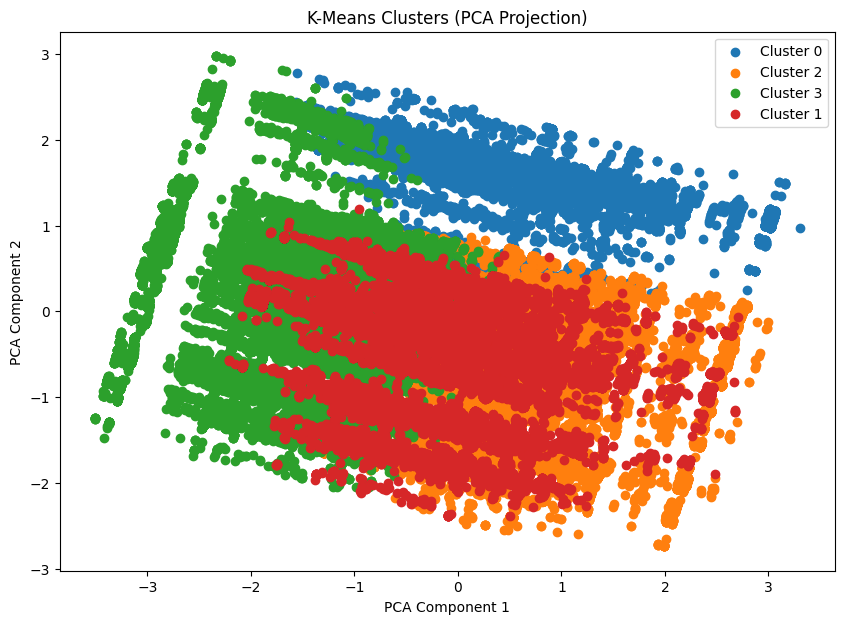

In [ ]:
# Choose the number of clusters (e.g., from elbow method)
optimal_k = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Print cluster counts
print("\nCluster Counts:")
print(df['Cluster'].value_counts())

# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Add PCA and cluster labels to dataframe
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 7))
for cluster in df['Cluster'].unique():
    plt.scatter(df[df['Cluster'] == cluster]['PCA1'], 
                df[df['Cluster'] == cluster]['PCA2'], 
                label=f'Cluster {cluster}')

plt.title('K-Means Clusters (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


